In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Đọc dữ liệu
df = pd.read_csv("/content/data.csv")

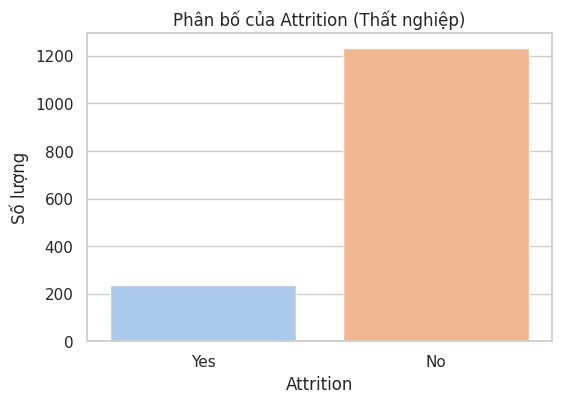

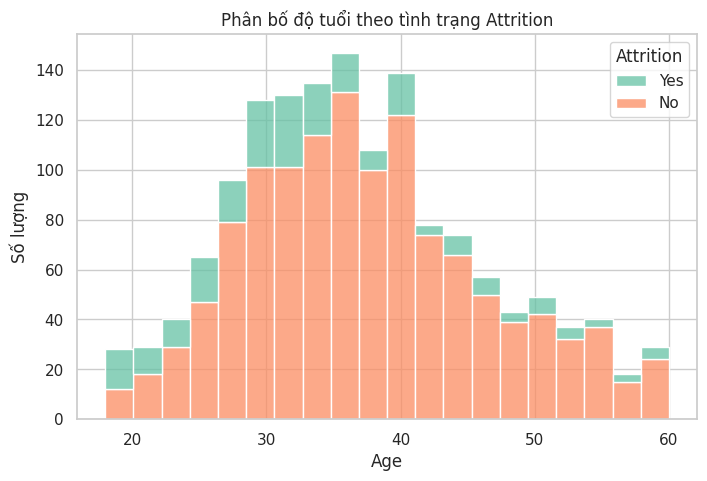

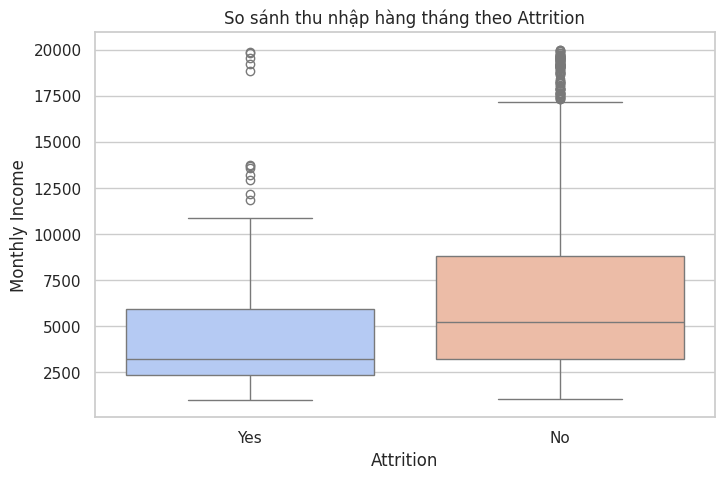

In [ ]:
# Trực quan hóa dữ liệu
# Cài đặt kiểu cho biểu đồ
sns.set(style="whitegrid")

# Biểu đồ phân bố Attrition
plt.figure(figsize=(6,4))
sns.countplot(x="Attrition", data=df, hue="Attrition", palette="pastel", legend=False)
plt.title("Phân bố của Attrition (Thất nghiệp)")
plt.xlabel("Attrition")
plt.ylabel("Số lượng")
plt.show()

# Biểu đồ phân bố độ tuổi theo Attrition
plt.figure(figsize=(8,5))
sns.histplot(df, x="Age", hue="Attrition", multiple="stack", bins=20, palette="Set2")
plt.title("Phân bố độ tuổi theo tình trạng Attrition")
plt.xlabel("Age")
plt.ylabel("Số lượng")
plt.show()

# Biểu đồ hộp so sánh thu nhập theo Attrition
plt.figure(figsize=(8,5))
sns.boxplot(x="Attrition", y="MonthlyIncome", data=df, hue="Attrition", palette="coolwarm", dodge=False)
plt.title("So sánh thu nhập hàng tháng theo Attrition")
plt.xlabel("Attrition")
plt.ylabel("Monthly Income")
plt.show()

In [ ]:
# Xóa các cột không cần thiết
df.drop(columns=["EmployeeCount", "EmployeeNumber", "StandardHours", "Over18"], inplace=True)


In [ ]:
# Mã hóa biến mục tiêu
le_attrition = LabelEncoder()
df["Attrition"] = le_attrition.fit_transform(df["Attrition"])

# Mã hóa các biến phân loại
categorical_cols = ["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "OverTime"]
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
# Chuẩn hóa dữ liệu số
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop("Attrition")
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Chia tập dữ liệu
X = df.drop(columns=["Attrition"])
y = df["Attrition"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Xây dựng mô hình ANN
#Mô hình 1
model_1 = keras.Sequential([
    keras.Input(shape=(X_train.shape[1],)),  # Khai báo đầu vào bằng keras.Input()
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
# Compile mô hình
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
history_1 = model_1.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Đánh giá mô hình
loss, accuracy = model_1.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy trên tập kiểm tra: {accuracy:.4f}")

Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7966 - loss: 0.5381 - val_accuracy: 0.8205 - val_loss: 0.4401
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8346 - loss: 0.4206 - val_accuracy: 0.8333 - val_loss: 0.4037
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8285 - loss: 0.3760 - val_accuracy: 0.8397 - val_loss: 0.3829
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8578 - loss: 0.3392 - val_accuracy: 0.8590 - val_loss: 0.3757
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8633 - loss: 0.3349 - val_accuracy: 0.8590 - val_loss: 0.3698
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8841 - loss: 0.2962 - val_accuracy: 0.8654 - val_loss: 0.3678
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9078 - loss: 0.2633 - val_accuracy: 0.8526 - val_loss: 0.3642
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9231 - loss: 0.2328 - val_accuracy: 0.8590 - val_loss

In [ ]:
# Mô hình thứ hai với nhiều lớp hơn
model_2 = keras.Sequential([
    keras.Input(shape=(X_train.shape[1],)),  # Khai báo đầu vào bằng keras.Input()
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile mô hình
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
history_2 = model_2.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Đánh giá mô hình
loss, accuracy = model_2.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy trên tập kiểm tra: {accuracy:.4f}")

Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6985 - loss: 0.5739 - val_accuracy: 0.8205 - val_loss: 0.4330
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8513 - loss: 0.3625 - val_accuracy: 0.8654 - val_loss: 0.3998
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8498 - loss: 0.3483 - val_accuracy: 0.8590 - val_loss: 0.4158
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8770 - loss: 0.3012 - val_accuracy: 0.8526 - val_loss: 0.4123
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9100 - loss: 0.2355 - val_accuracy: 0.8526 - val_loss: 0.4321
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9307 - loss: 0.1934 - val_accuracy: 0.8333 - val_loss: 0.4335
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9645 - loss: 0.1575 - val_accuracy: 0.8590 - val_loss: 0.5039
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9524 - loss: 0.1465 - val_accuracy: 0.8526 - val_loss

In [ ]:
# Mô hình thứ ba với hàm kích hoạt khác
model_3 = keras.Sequential([
    keras.Input(shape=(X_train.shape[1],)),  # Khai báo input bằng keras.Input()
    layers.Dense(64, activation='tanh'),
    layers.Dense(32, activation='tanh'),
    layers.Dense(1, activation='sigmoid')
])

# Compile mô hình
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
history_3 = model_3.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Đánh giá mô hình
loss, accuracy = model_3.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy trên tập kiểm tra: {accuracy:.4f}")

Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5112 - loss: 0.7776 - val_accuracy: 0.6987 - val_loss: 0.5568
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7865 - loss: 0.4884 - val_accuracy: 0.8205 - val_loss: 0.4602
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8572 - loss: 0.4117 - val_accuracy: 0.8269 - val_loss: 0.4161
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8567 - loss: 0.3688 - val_accuracy: 0.8269 - val_loss: 0.4007
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8810 - loss: 0.3341 - val_accuracy: 0.8462 - val_loss: 0.4010
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8691 - loss: 0.2943 - val_accuracy: 0.8526 - val_loss: 0.4026
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8990 - loss: 0.2738 - val_accuracy: 0.8333 - val_loss: 0.3935
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9064 - loss: 0.2640 - val_accuracy: 0.8269 - val_loss:

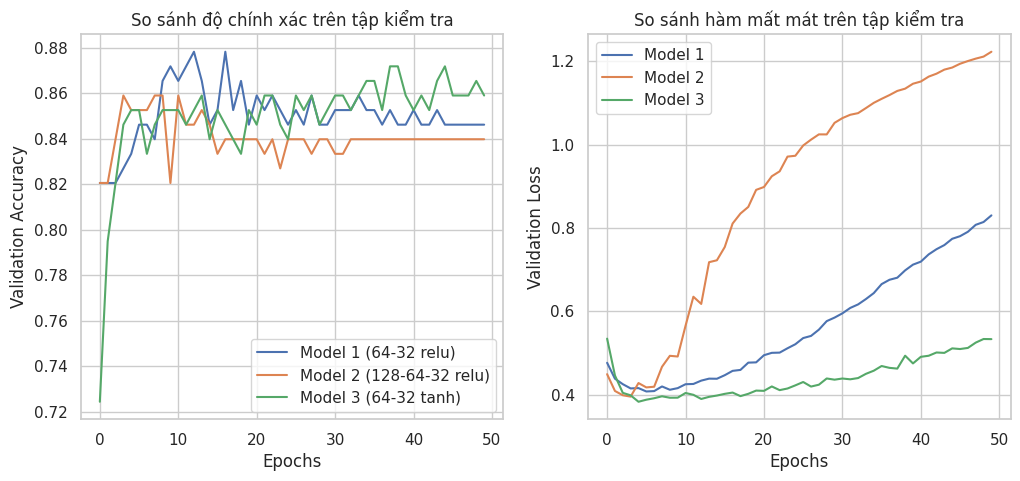

In [ ]:
# So sánh kết quả
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_1.history['val_accuracy'], label='Model 1 (64-32 relu)')
plt.plot(history_2.history['val_accuracy'], label='Model 2 (128-64-32 relu)')
plt.plot(history_3.history['val_accuracy'], label='Model 3 (64-32 tanh)')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.title('So sánh độ chính xác trên tập kiểm tra')

plt.subplot(1, 2, 2)
plt.plot(history_1.history['val_loss'], label='Model 1')
plt.plot(history_2.history['val_loss'], label='Model 2')
plt.plot(history_3.history['val_loss'], label='Model 3')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.title('So sánh hàm mất mát trên tập kiểm tra')
plt.show()